# Customer Segmentation

The goal of this project is to segment customers into clusters

## Imports

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer

# reading the data frame
filename = 'C:\devel\DS projects\mall_customer_segmentation\Mall_Customers.csv'
df = pd.read_csv(filename)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Pre-processing

Variables are standardized around mean 0 and std 1

In [4]:
# Features to standardize
colms = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = df[colms]

# Standardize features
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features = pd.DataFrame(features, columns = colms)
scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


Convert categorical feature to dummy features

In [5]:
gender = df['Gender']
gender = pd.get_dummies(gender, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
gender = gender.drop(['Male'],axis =1)

newdf = scaled_features.join(gender)
newdf.head()
# newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

# newdf = newdf.drop(['Gender_Male'],axis=1)



,Annual Income (k$),Age,Spending Score (1-100),Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1


## Modeling

### Build a clustering model: KMeans

#### Kmeans inertia

In [6]:
SSE = []  # Sum Squared Error

for cluster in range(1,11):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init = 'k-means++')
    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)
    
SSE

D:\anaconda\envs\mall_customer_segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\anaconda\envs\mall_customer_segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\anaconda\envs\mall_customer_segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\anaconda\envs\mall_customer_segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warn

[649.2800000000002,
 438.5224115567773,
 344.40542886953494,
 254.28290726083466,
 216.78490151651044,
 181.9514362434146,
 164.7671666644516,
 151.81784790283464,
 139.9876121656165,
 129.7055689850882]

Text(0, 0.5, 'Inertia')

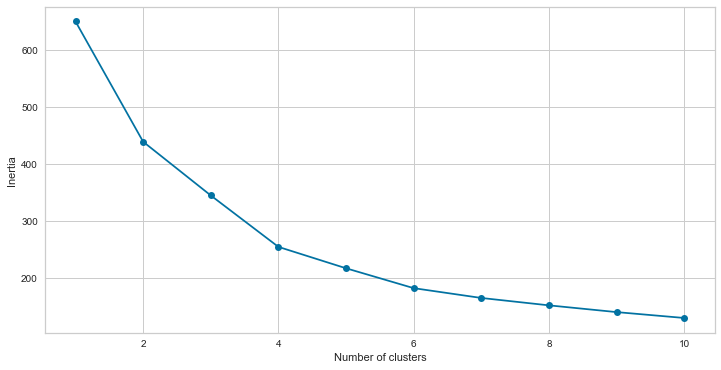

In [7]:
frame = pd.DataFrame({'Cluster':range(1,11),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### Elbow Method

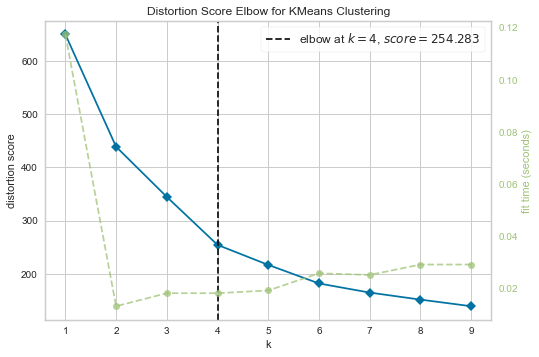

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,10), timings= True)
visualizer.fit(newdf)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

#### Optimal Clusters: 4

#### Silhouette coefficient: Used to quantify the quality of clusters created (higher the better)

In [9]:
# First, build a model with 4 clusters

kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(newdf)

# Now, print the silhouette score of this model

print(silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

0.35027020434653977


D:\anaconda\envs\mall_customer_segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


D:\anaconda\envs\mall_customer_segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


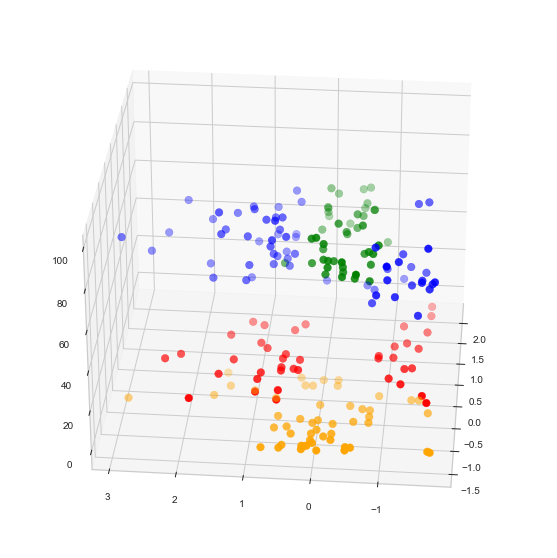

In [11]:
newdf.head() 
clusters = kmeans.fit_predict(newdf.iloc[:,1:])
newdf["label"] = clusters

fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], df["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)

ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], df["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

#### Feature selection

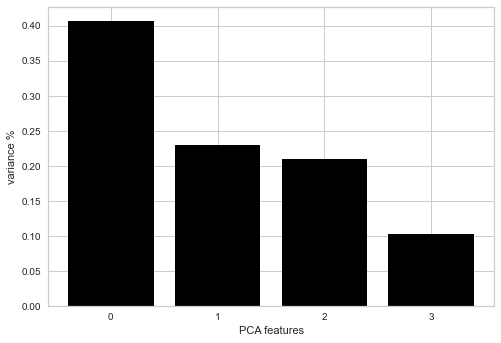

In [13]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

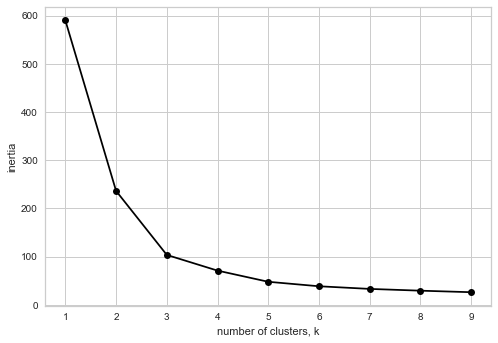

silhouette_score 0.6013079285707722


In [15]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print("silhouette_score",silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean'))

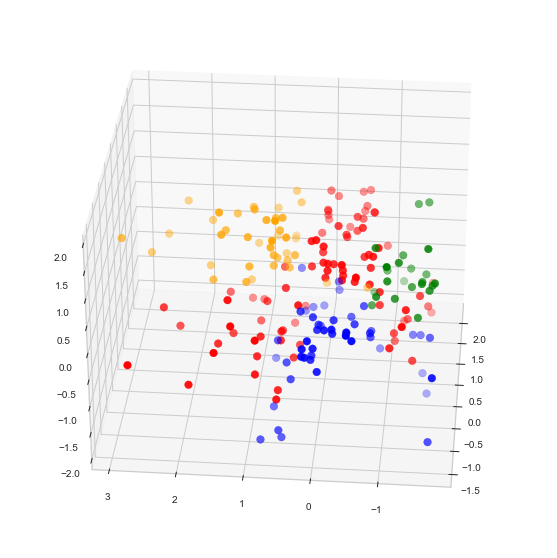

In [16]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)

ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

In [47]:
df = pd.read_csv(filename)
df = df.drop(['CustomerID'],axis=1)

# map back clusters to dataframe

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,0
1,Male,21,15,81,2
2,Female,20,16,6,0
3,Female,23,16,77,2
4,Female,31,17,40,0


In [48]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
avg_df.head()

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,26.937500,53.437500,40.416667
1,1,51.681818,62.125000,33.750000
2,2,25.521739,26.304348,78.565217
3,3,32.731707,84.756098,81.048780


<AxesSubplot:xlabel='cluster', ylabel='Age'>

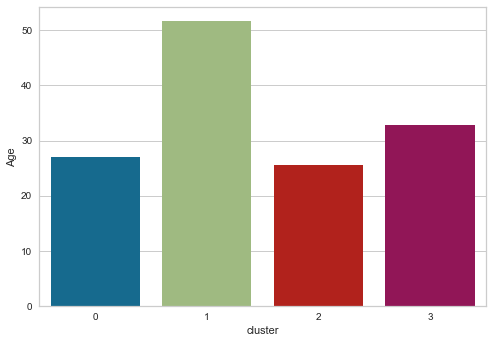

In [49]:
sns.barplot(x='cluster',y='Age',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

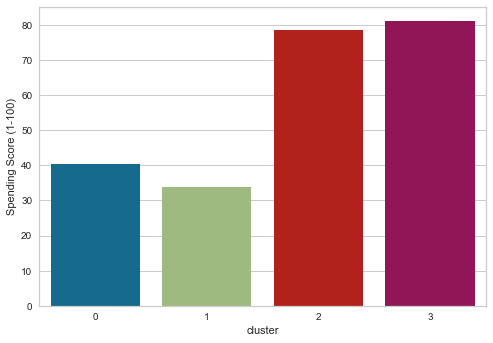

In [50]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

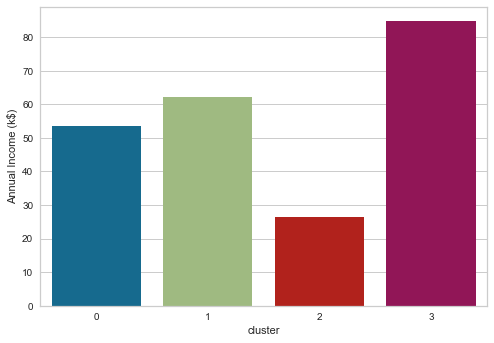

In [51]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

In [53]:
df2 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
df2

Gender
cluster Gender        
0       Female      29
        Male        19
1       Female      47
        Male        41
2       Female      14
        Male         9
3       Female      22
        Male        19

## Results

### Cluster Analysis

Cluster 0:
* Average mean annual income, average spending score
* Mean age of 27, mostly female

Cluster 1:
* Higher than average mean annual income, low spending score
* Mean age is 50, mostly Female

Cluster 2:
* Low mean annual income, very high mean spending score (>75)
* Mean age of 24, mostly female

Cluster 3:
* Very high avg. annual income, Very high spedning score (>80)
* Mean age of 32, mostly female
